In [5]:
# Import libraries

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #For ignore warnings

In [9]:
from sklearn.preprocessing import LabelEncoder
pd.set_option('max_columns',None) #For view all the columns of dataset
credit_data_df=pd.read_csv('german_credit_data.txt',delim_whitespace=True) #read dataset

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency of good and bad status of customer

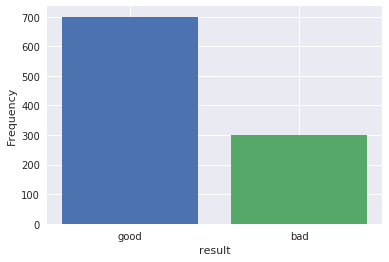

In [11]:
y1=credit_data_df.result[credit_data_df.result==1].count()
y2=credit_data_df.result[credit_data_df.result==2].count()
plt.bar('good',y1)
plt.bar('bad',y2)
plt.xlabel("result")
plt.ylabel("Frequency")
plt.show()

# Frequency of total customer with respect to their age

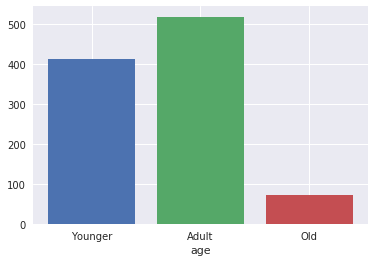

In [12]:
plt.bar('Younger',credit_data_df.age[(credit_data_df.age>=18) & (credit_data_df.age<=30)].count())
plt.bar('Adult',credit_data_df.age[(credit_data_df.age>=31) & (credit_data_df.age<=55)].count())
plt.bar('Old',credit_data_df.age[(credit_data_df.age>55)].count())
plt.xlabel("age")
plt.show()

 # Frequency of people with good status for credit

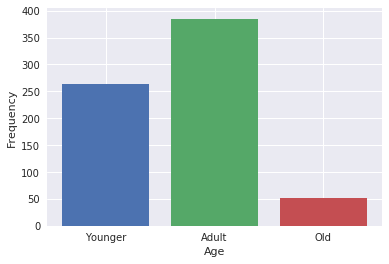

In [14]:
plt.bar('Younger',credit_data_df.age[(credit_data_df.age>=18) & (credit_data_df.age<=30) & (credit_data_df.result==1)].count())
plt.bar('Adult',credit_data_df.age[(credit_data_df.age>=31) & (credit_data_df.age<=55) & (credit_data_df.result==1)].count())
plt.bar('Old',credit_data_df.age[(credit_data_df.age>55) & (credit_data_df.result==1)].count())
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Relatioship between age and credit amount with result status

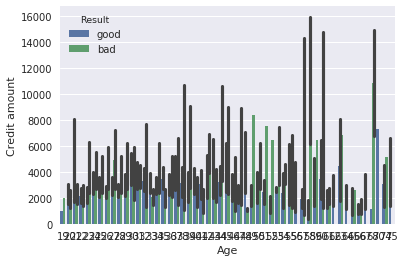

In [16]:
credit_data_df['Result']=credit_data_df.result
credit_data_df['Result'].loc[credit_data_df.Result==1]='good'
credit_data_df['Result'].loc[credit_data_df.Result==2]='bad'
sns.barplot(credit_data_df.age,credit_data_df.Credit_amount,hue=credit_data_df.Result)
plt.ylabel("Credit amount")
plt.xlabel("Age")
plt.show()
credit_data_df.drop(['Result'],axis=1,inplace=True)

# Funtion to convert categorical into numerical

In [17]:
def categorical_to_numerical(lb_object,credit_data_df):
    for col in credit_data_df.columns:
        if credit_data_df[col].dtype==object:  #check datatype of columns
            credit_data_df[col]=lb_object.fit_transform(credit_data_df[col])   #fit and transform the column
    return credit_data_df                # return transformed dataframe

In [18]:
lb_object=LabelEncoder() #Create lable encoder object
credit_data_df=categorical_to_numerical(lb_object,credit_data_df) #Call above funtion for change categorical to numerical
